In [ ]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [ ]:
df=pd.read_csv('Salary_dataset.csv')

Exploratory data analysis

pandas shape attribute

In [ ]:
print(df.shape)

(30, 3)


pandas head() method

In [ ]:
print(df.head())

   Sr  Yearxperience   Salary
0   0            1.2  39344.0
1   1            1.4  46206.0
2   2            1.6  37732.0
3   3            2.1  43526.0
4   4            2.3  39892.0


pandas columns attribute

In [ ]:
#rename column labels of dataframe with columns attribute
df.columns=['EmpID','Year_of_Experience','Salary']

column names renamed

In [ ]:
print(df.head())

   EmpID  Year_of_Experience   Salary
0      0                 1.2  39344.0
1      1                 1.4  46206.0
2      2                 1.6  37732.0
3      3                 2.1  43526.0
4      4                 2.3  39892.0


pandas info() method

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmpID               30 non-null     int64  
 1   Year_of_Experience  30 non-null     float64
 2   Salary              30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


pandas describe() method

In [ ]:
print(df.describe())

           EmpID  Year_of_Experience         Salary
count  30.000000           30.000000      30.000000
mean   14.500000            5.413333   76004.000000
std     8.803408            2.837888   27414.429785
min     0.000000            1.200000   37732.000000
25%     7.250000            3.300000   56721.750000
50%    14.500000            4.800000   65238.000000
75%    21.750000            7.800000  100545.750000
max    29.000000           10.600000  122392.000000


independent and dependent variables

In [ ]:
#declare feature variable and input variable

x=df['Year_of_Experience'].values
y=df['Salary'].values

# years of experience and salary data values are given by x and y respectively
#y=target/dependent variabale
#x=independent variable
#values attribute of pandas dataframe returns numpy arrays

visual eda

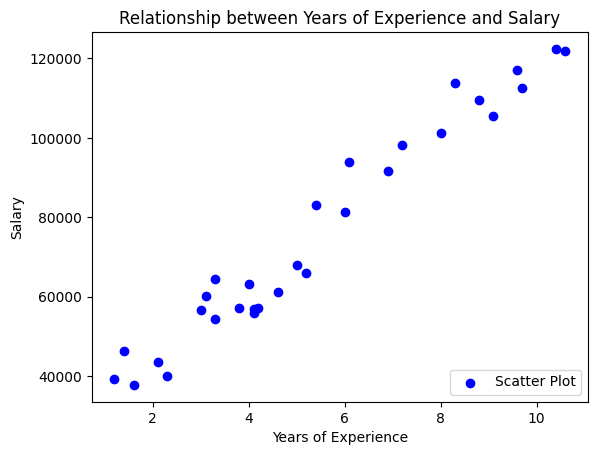

In [ ]:
#plot scatter plot between x and y
plt.scatter(x,y,color='blue',label='Scatter Plot')
plt.title('Relationship between Years of Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()



checking dimensions of X and Y

In [ ]:
#print dimensions of x and y
print(x.shape)
print(y.shape)


(30,)
(30,)


reshaping x and y

In [ ]:
#reshape x and y
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [ ]:
#print dimensions of x and y after reshaping
print(x.shape)
print(y.shape)


(30, 1)
(30, 1)


difference in dimension of x and y after reshaping

train test split

In [ ]:
#split x and y into training and test data sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [ ]:
#print the dimensions of x_train,x_test,y_train,y_test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(20, 1)
(20, 1)
(10, 1)
(10, 1)


Mechanics of the model

In [ ]:
#fit the linear model

#instantiate the linear regression object Lm
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

#train the model using training data sets
lm.fit(x_train,y_train)

#predict on the test data
y_pred=lm.predict(x_test)

model slope and intercept term

In [ ]:
#compute model slope and intercept

a=lm.coef_
b=lm.intercept_
print("Estimated model slope, a:",a)
print("Estimated model intercept, b:",b)

#fittedregression line is y=9426.03876907 * x 24382.73150234
#this is our linear model

Estimated model slope, a: [[9426.03876907]]
Estimated model intercept, b: [24382.73150234]


making predictiobs

In [ ]:
#predicting salary values
lm.predict(x)[0:5]
#predicting advertising values on first five sales values

array([[35693.97802523],
       [37579.18577904],
       [39464.39353286],
       [44177.41291739],
       [46062.62067121]])

In [ ]:
#to make an individual prediction using linear regression model
print(str(lm.predict([[20]])))


[[212903.50688383]]


regression metrics for model performance

RMSE (root mean square error)

In [ ]:
#actual value - predicted value= residual
#calculate and print the root mean square error(RMSE)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 5941.5401


R2 score

In [ ]:
#calculate and print r2_score

from sklearn.metrics import r2_score
print("R2 Score Value: {:.4f}".format(r2_score(y_test,y_pred)))

R2 Score Value: 0.9553


interpretation and conclusion

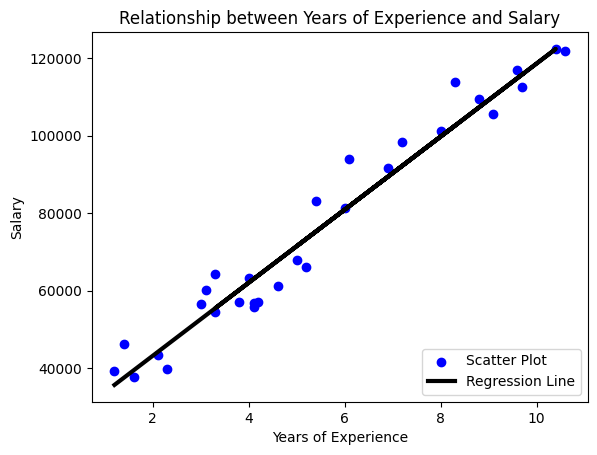

In [ ]:
#plot the regression line

plt.scatter(x,y,color='blue',label='Scatter Plot')
plt.plot(x_test,y_pred,color='black', linewidth=3,label='Regression Line')
plt.title('Relationship between Years of Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(loc=4)
plt.show()

residual analysis

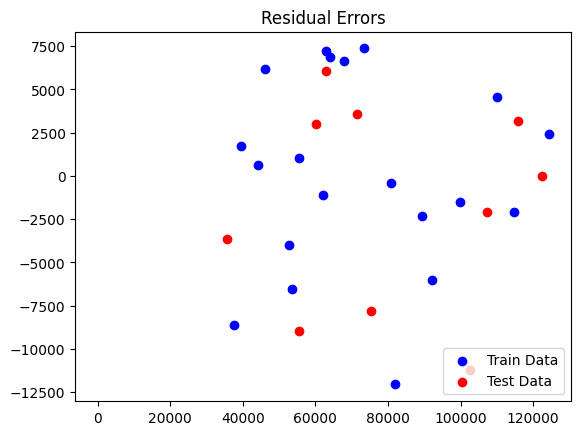

In [ ]:
#plotting residual errors
plt.scatter(lm.predict(x_train),lm.predict(x_train)-y_train,color='blue',label='Train Data')
plt.scatter(lm.predict(x_test),lm.predict(x_test)-y_test,color='red',label='Test Data')
plt.hlines(xmin = 0, xmax = 50 , y = 0, linewidth = 3)
plt.title('Residual Errors')
plt.legend(loc=4)
plt.show()


checking for overfitting and underfitting

In [ ]:
print("training set score: {:.4f}".format(lm.score(x_train,y_train)))
print("test set score: {:.4f}".format(lm.score(x_test,y_test)))

training set score: 0.9549
test set score: 0.9553
